In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("price_data.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

### 1) Preprocessing

In [4]:
df = df.rename(columns={'symboling': 'etat_de_route', 'CarName': 'marque_voiture', 'fueltype': 'carburant', 'aspiration': 'turbo', 'doornumber': 'nombre_portes', 'carbody': 'type_vehicule',
                         'drivewheel': 'transmission', 'enginelocation': 'emplacement_moteur', 'wheelbase': 'empattement', 'carlength': 'longueur_voiture', 'carwidth': 'largeur_voiture', 
                         'carheight': 'hauteur_voiture', 'curbweight': 'poids_vehicule', 'enginetype': 'type_moteur', 'cylindernumber': 'nombre_cylindres', 'enginesize': 'taille_moteur', 
                         'fuelsystem': 'systeme_carburant', 'boreratio': 'taux_alésage', 'stroke': 'course', 'compressionratio': 'taux_compression', 'horsepower': 'chevaux', 
                         'peakrpm': 'tour_moteur', 'citympg':'consommation_ville', 'highwaympg': 'consommation_autoroute', 'price': 'prix'})

In [5]:
def transofme_unitées(data):
    # Convert the wheelbase column from inches to centimeters
    df['empattement'] = df['empattement'] * 2.54
    # Convert longueur_voiture column from inches to centimeters
    df['longueur_voiture'] = df['longueur_voiture'] * 2.54
    # Convert carwidth column from inches to centimeters
    df['largeur_voiture'] = df['largeur_voiture'] * 2.54
    # Convert hauteur_voiture column from inches to centimeters
    df['hauteur_voiture'] = df['hauteur_voiture'] * 2.54
    # Convert the wheelbase column from inches to mm
    df['course'] = df['course'] * 25.4
    # Convert the curbweight column from pounds to kilograms
    df['poids_vehicule'] = df['poids_vehicule'] * 0.453592
    # Convert the curbweight column from inches cubes to cm cubes
    df['taille_moteur'] = df['taille_moteur'] * 16.387064
    # Convert taux_alésage column from inches to mm
    df['taux_alésage'] = df['taux_alésage'] * 25.4
    # Convert citympg from mpg to litres per 100 km
    df['consommation_ville'] = 235.21 / df['consommation_ville']
    # Convert highwaympg from mpg to litres per 100 km
    df['consommation_autoroute'] = 235.21 / df['consommation_autoroute']
    return data

In [6]:
df = transofme_unitées(df)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   etat_de_route           205 non-null    int64  
 2   marque_voiture          205 non-null    object 
 3   carburant               205 non-null    object 
 4   turbo                   205 non-null    object 
 5   nombre_portes           205 non-null    object 
 6   type_vehicule           205 non-null    object 
 7   transmission            205 non-null    object 
 8   emplacement_moteur      205 non-null    object 
 9   empattement             205 non-null    float64
 10  longueur_voiture        205 non-null    float64
 11  largeur_voiture         205 non-null    float64
 12  hauteur_voiture         205 non-null    float64
 13  poids_vehicule          205 non-null    float64
 14  type_moteur             205 non-null    ob

In [9]:
nom_marque = df["marque_voiture"].apply(lambda x: x.split(" ")[0])
df.insert(2,"marque_de_voiture",nom_marque)

# Now we can drop the CarName Feature.
df.drop(columns=["marque_voiture"],inplace=True)

In [10]:
# Convertir tous les noms de marque en minuscules
df['marque_de_voiture'] = df['marque_de_voiture'].str.lower()

In [11]:
def replace(a,b):
    df["marque_de_voiture"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [12]:
df["marque_de_voiture"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
df.describe()

,car_ID,etat_de_route,empattement,longueur_voiture,largeur_voiture,hauteur_voiture,poids_vehicule,taille_moteur,taux_alésage,course,taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,250.841727,442.085141,167.405824,136.461190,1159.184227,2079.638327,84.575805,82.687532,10.142537,104.117073,5125.121951,9.958416,8.041527,13276.710571
std,59.322565,1.245307,15.295310,31.336713,5.448818,6.206546,236.176375,682.401483,6.879430,7.965364,3.972040,39.544167,476.985643,2.575403,1.851435,7988.852332
min,1.000000,-2.000000,219.964000,358.394000,153.162000,121.412000,674.944896,999.610904,64.516000,52.578000,7.000000,48.000000,4150.000000,4.800204,4.355741,5118.000000
25%,52.000000,0.000000,240.030000,422.402000,162.814000,132.080000,972.954840,1589.545208,80.010000,78.994000,8.600000,70.000000,4800.000000,7.840333,6.917941,7788.000000
50%,103.000000,1.000000,246.380000,439.928000,166.370000,137.414000,1094.971088,1966.447680,84.074000,83.566000,9.000000,95.000000,5200.000000,9.800417,7.840333,10295.000000
75%,154.000000,2.000000,260.096000,465.074000,169.926000,140.970000,1331.292520,2310.576024,90.932000,86.614000,9.400000,116.000000,5500.000000,12.379474,9.408400,16503.000000
max,205.000000,3.000000,307.086000,528.574000,183.642000,151.892000,1844.305072,5342.182864,100.076000,105.918000,23.000000,288.000000,6600.000000,18.093077,14.700625,45400.000000


### 2) Vérification des valeurs manquantes

In [14]:
df.isnull().sum()

car_ID                    0
etat_de_route             0
marque_de_voiture         0
carburant                 0
turbo                     0
nombre_portes             0
type_vehicule             0
transmission              0
emplacement_moteur        0
empattement               0
longueur_voiture          0
largeur_voiture           0
hauteur_voiture           0
poids_vehicule            0
type_moteur               0
nombre_cylindres          0
taille_moteur             0
systeme_carburant         0
taux_alésage              0
course                    0
taux_compression          0
chevaux                   0
tour_moteur               0
consommation_ville        0
consommation_autoroute    0
prix                      0
dtype: int64

### 3) Vérification des valeurs dupliquées

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

### 4) Analyse des données

In [16]:
# Obtenir les comptes de chaque marque de voiture
counts = df["marque_de_voiture"].value_counts().reset_index()

# Définir les couleurs
colors = px.colors.qualitative.Plotly

# Créer le graphique de barres
fig = px.bar(counts, x="marque_de_voiture", y="count", color="marque_de_voiture", color_discrete_sequence=colors)

# Personnaliser les labels d'axes
fig.update_xaxes(title_text="Marque de voiture", title_font=dict(size=14, family="Arial", color="black"))
fig.update_yaxes(title_text="Nombre total de voitures", title_font=dict(size=14, family="Arial", color="black"))

# Personnaliser le titre du graphique
fig.update_layout(title_text="Nombre total de voitures  par les marques", title_font=dict(size=20, family="Arial", color="black"), title_pad=dict(b=20))

# Afficher le graphique
fig.show()

In [17]:
# regroupement des données par marque de voiture et calcul de la moyenne des prix
df_grouped = df.groupby("marque_de_voiture").agg({"prix": "mean"}).reset_index()

# tri des données en ordre décroissant de moyenne des prix
df_grouped = df_grouped.sort_values("prix", ascending=False)

# création du graphique à barres
fig = px.bar(df_grouped, x="marque_de_voiture", y="prix", 
             color="marque_de_voiture",
             color_discrete_sequence=px.colors.qualitative.Pastel)

# personnalisation du titre et des étiquettes d'axe
fig.update_layout(title="La marque de la voiture vs le prix des voitures",
                  xaxis_title="La marque de la voiture",
                  yaxis_title="Average Price")

# affichage du graphique
fig.show()

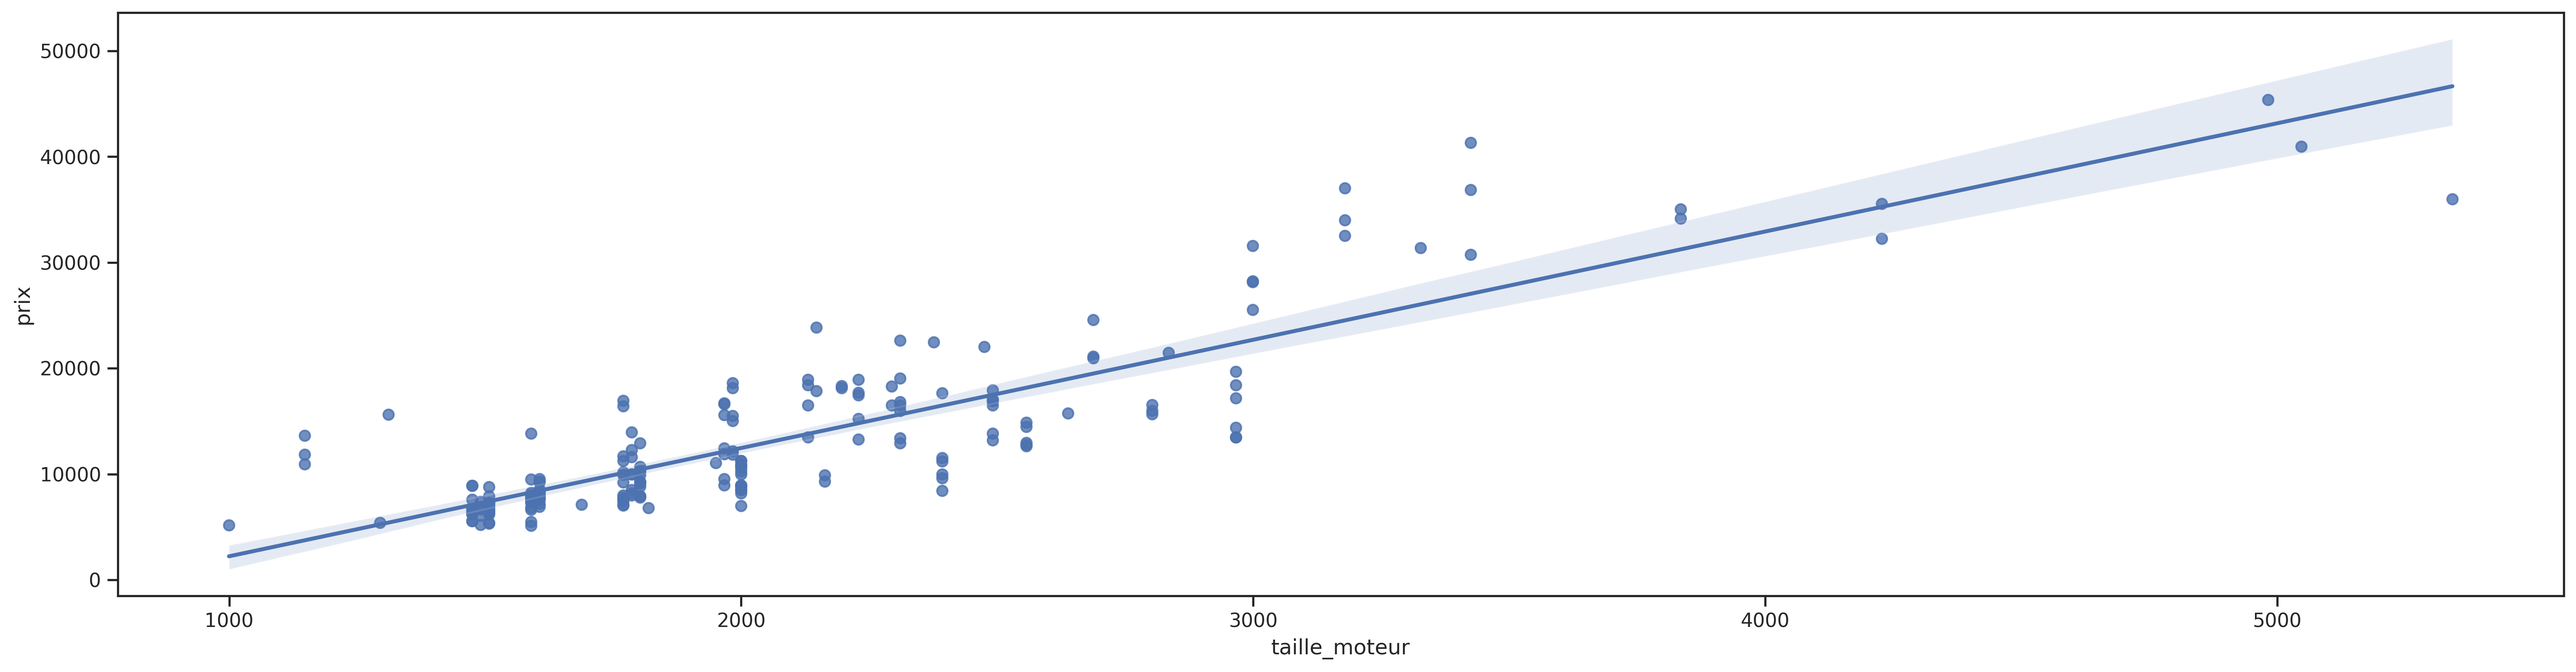

In [83]:
plt.figure(figsize=(25,6),dpi=300)
relplot = sns.regplot(data=df, x="taille_moteur", y="prix")

<Axes: ylabel='count'>

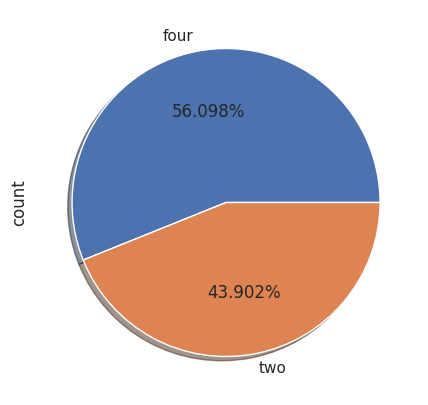

In [88]:
plt.figure(figsize = [5, 5], clear = True, facecolor = "#ffffff")
df["nombre_portes"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True)

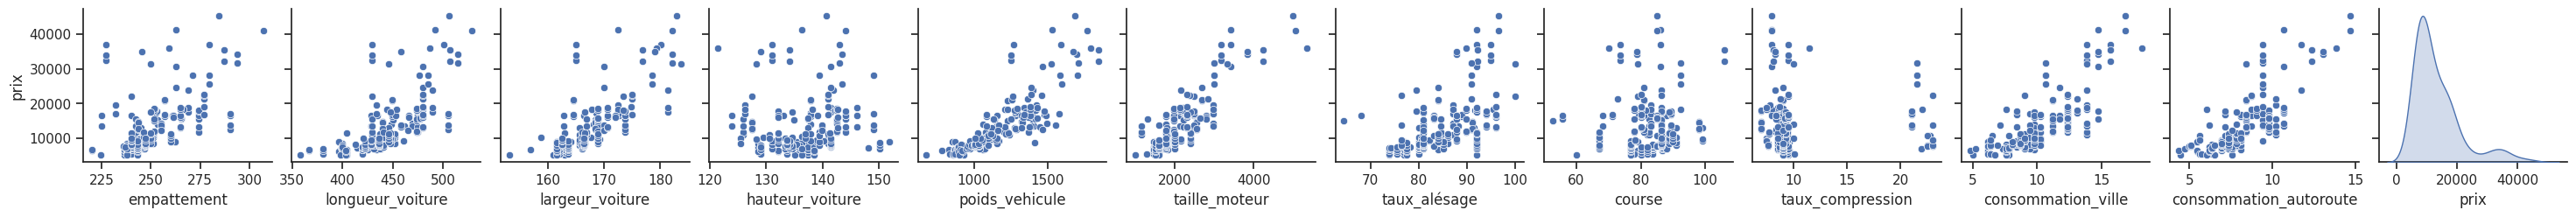

In [80]:
sns.set(style="ticks", color_codes=True)

# création du graphique
sns.pairplot(df, x_vars=df.columns[df.dtypes == float], y_vars=["prix"], kind="scatter", diag_kind="kde")


# affichage du graphique
plt.show()

### 5) Encodage et transformation (normalisation) des variables

In [71]:
categorial_features = ['etat_de_route', 'carburant', 'turbo', 'nombre_portes', 'type_vehicule', 'transmission', 'emplacement_moteur', 'type_moteur', 'nombre_cylindres', 'systeme_carburant', 'marque_de_voiture']

numeric_features = ['empattement', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'taille_moteur', 'taux_alésage', 'course', 'taux_compression', 'chevaux', 'tour_moteur', 'consommation_ville', 'consommation_autoroute']

# One-hot encode the categorical variables
cat_feat = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
])
X_cat_transformed = cat_feat.fit_transform(df[categorial_features])
X_cat_transformed_df = pd.DataFrame(X_cat_transformed.toarray(),
                                    columns=cat_feat['onehotencoder'].get_feature_names_out(categorial_features))

# Combine the one-hot encoded categorical variables and the target variable into a single dataframe
df_combined = pd.concat([X_cat_transformed_df, df[numeric_features] , df['prix']], axis=1)

### 6) Calcul de la corrélation entre la variables prix et les autres variables

<Axes: >

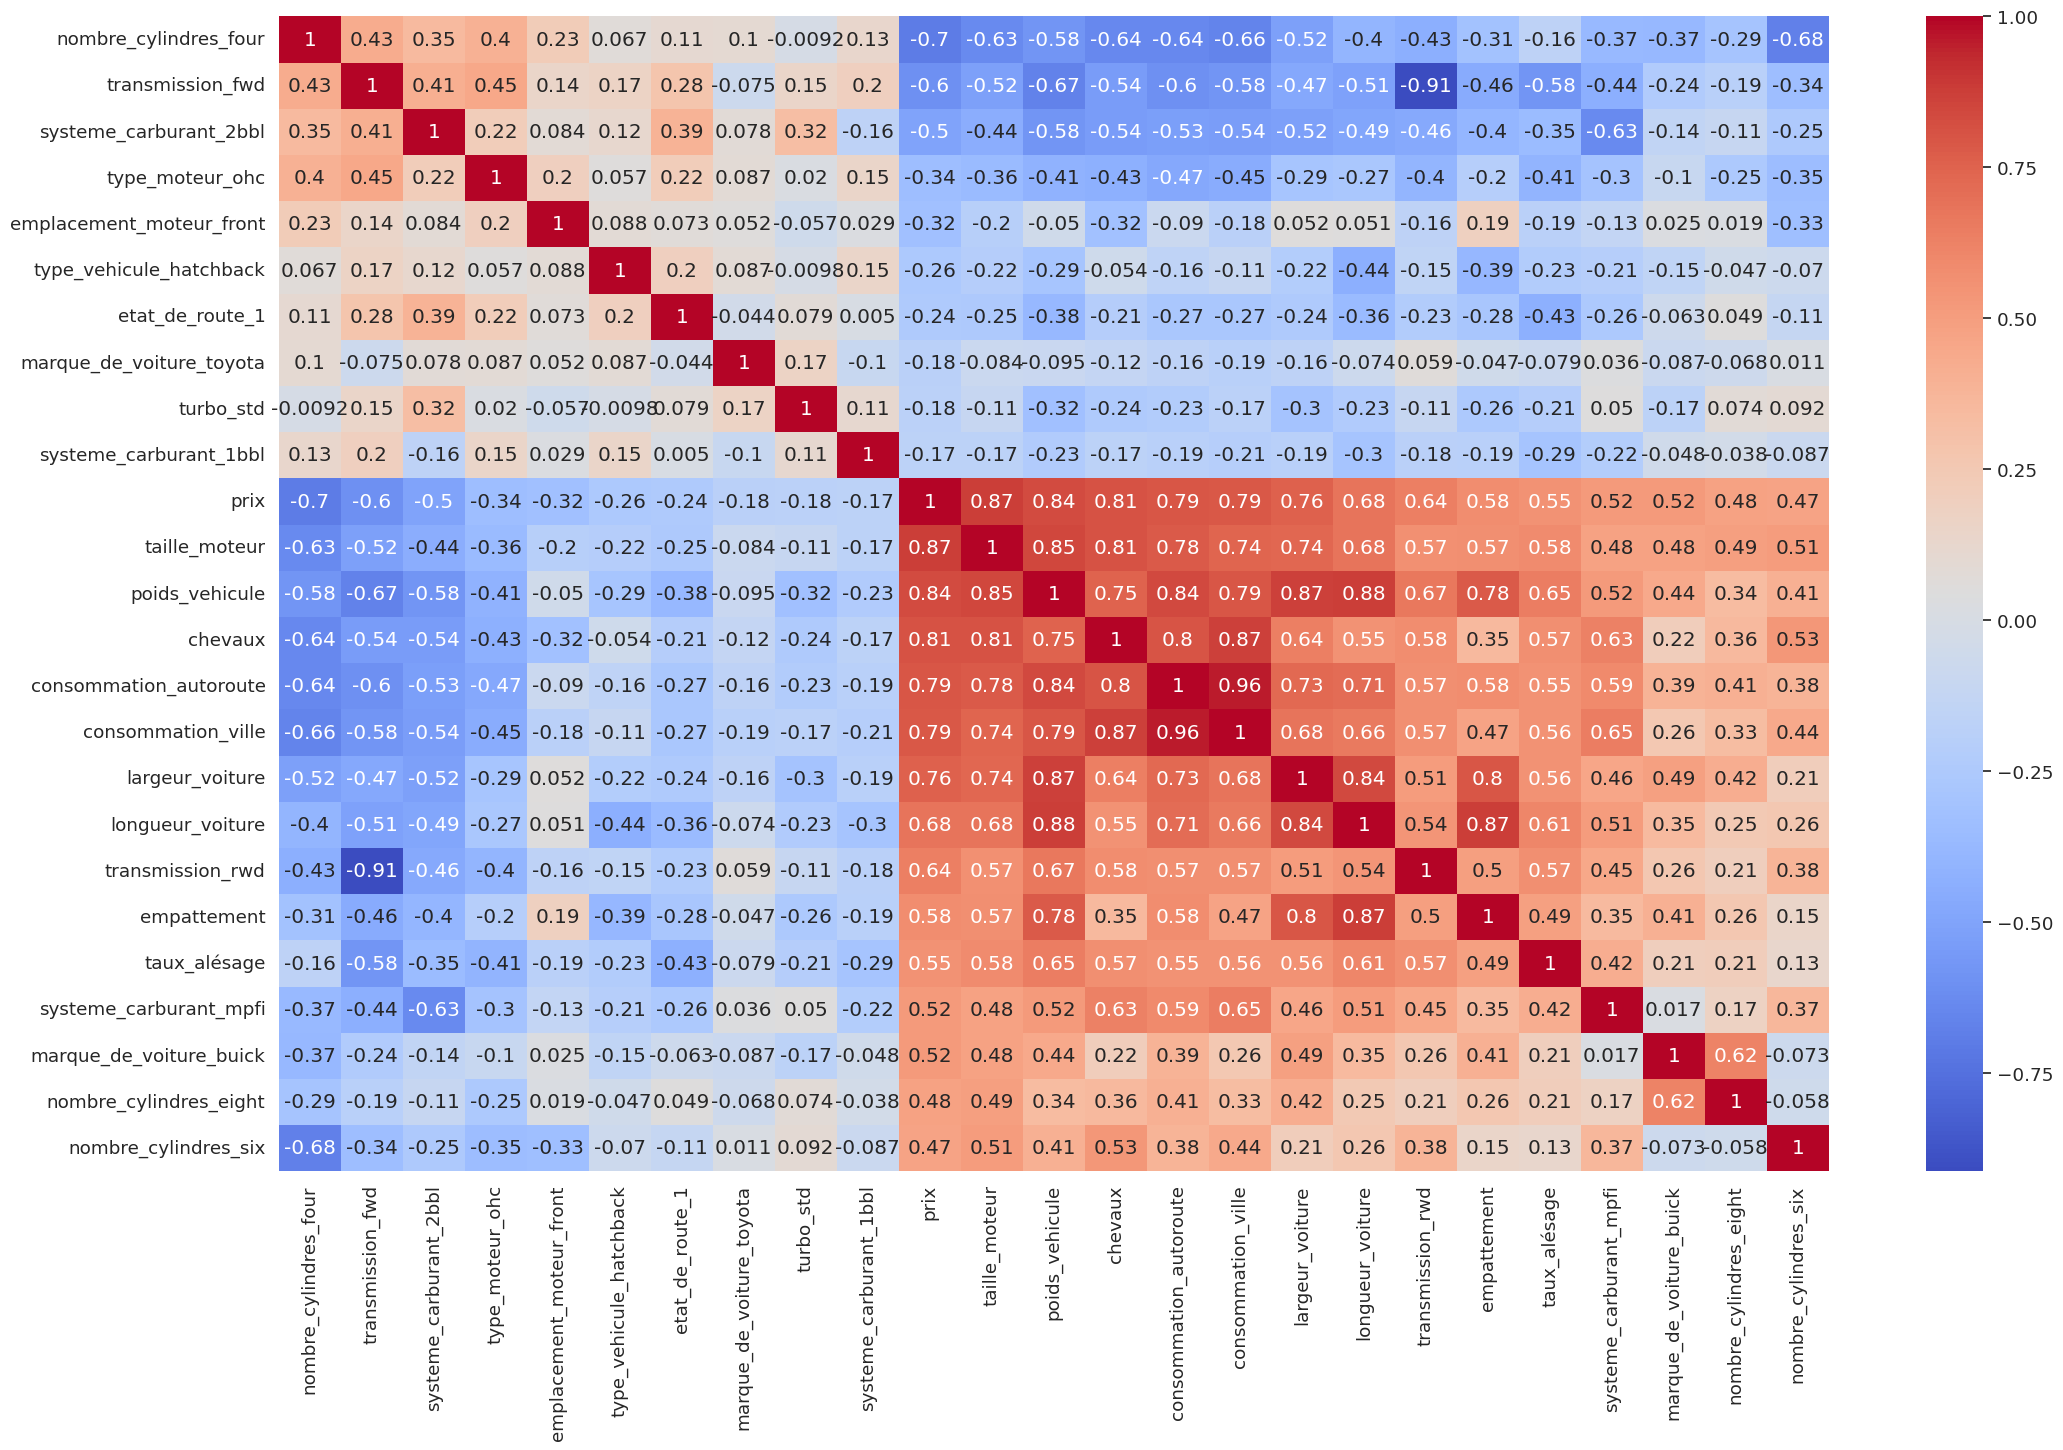

In [72]:
# Calculate the correlation between all the variables
corr_matrix = df_combined.corr()

# Get the 10 highest and 10 lowest correlations with the 'prix' variable

top_corr = corr_matrix['prix'].sort_values(ascending=False).head(15)
bot_corr = corr_matrix['prix'].sort_values().head(10)
top_corr = pd.concat([bot_corr, top_corr])

# Plot heatmap
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr_matrix.loc[top_corr.index, top_corr.index], annot=True, cmap='coolwarm')

### 6) Spliting data 

In [73]:
X= df.drop('prix', axis =1)
y = df['prix']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
print("Traing Data Shape of x and y respectively:  ", X_train.shape, y_train.shape)
print("Testing Data Shape of x and y respectively:  ", X_test.shape, y_test.shape)

Traing Data Shape of x and y respectively:   (164, 25) (164,)
Testing Data Shape of x and y respectively:   (41, 25) (41,)


### 7) Building Model

In [76]:
categorial_features = ['etat_de_route', 'carburant', 'turbo', 'nombre_portes', 'type_vehicule', 'transmission', 'emplacement_moteur', 'type_moteur', 'nombre_cylindres', 'systeme_carburant', 'marque_de_voiture']

numeric_features = ['empattement', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture', 'poids_vehicule', 'taille_moteur', 'taux_alésage', 'course', 'taux_compression', 'chevaux', 'tour_moteur', 'consommation_ville', 'consommation_autoroute']

# Define the column transformer to apply the OneHotEncoder to categorical features
# and the MinMaxScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorial_features),
        ('num', MinMaxScaler(), numeric_features)
    ])

# Define the pipeline that combines the preprocessor with the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

### 8) Model Evaluation

In [ ]:
# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score on test set: ", score)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

R-squared score on test set:  -2.900802326854164e+22
Mean Squared Error (MSE):  2.0098028669023828e+30
Mean Absolute Error (MAE):  233334686910384.1


In [ ]:


# to show the relation between engine size and price 

plt.figure(figsize=(25,10))
sns.scatterplot(data=df,x="enginesize",y="price",hue="fueltype",markers=True)
plt.title("The relation between engine size and price")
plt.xlabel("Engine Size")
plt.ylabel("The Price")



In [ ]:
# this some graphs to showing the wheelbase , car length, car width, car height if have any affect in price


fig = plt.figure(figsize=(26, 12))

ax1 = fig.add_subplot(221)
sns.scatterplot(data=df,x="wheelbase",y="price",hue="fueltype",markers=True)

ax2 = fig.add_subplot(222)
sns.scatterplot(data=df,x="carlength",y="price",hue="fueltype",markers=True)

ax3 = fig.add_subplot(223)
sns.scatterplot(data=df,x="carwidth",y="price",hue="fueltype",markers=True)


ax4 = fig.add_subplot(224)
sns.scatterplot(data=df,x="carheight",y="price",hue="fueltype",markers=True)



ax1.title.set_text('Wheelbase with Price')
ax2.title.set_text('car length  with Price')
ax3.title.set_text('car width with Price')
ax4.title.set_text('car height with Price')
plt.show()

In [ ]:
columns=['wheelbase','curbweight','boreratio','carwidth','carlength','enginesize']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'price', data = df)
plt.show()




Insights:

    There's some cars its wheel base make a differance and affect on price of this car.

    The bigger the number of engine size, the more expensive the car usually is to buy.

    There're some outliters values but almost by increasing boreratio the price is increasing.

    Bore ratio of car and the rate of feul consumption are factors affect on the performance of car and also price.

    By increasinng car length and width values, price is increaing.

    The heavier the vehicle, the more energy it needs to get moving.

    By increasing curbweight, the price of cars will be affect but not more because there are more outliters.

